# Practice_1

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
x=[[1],[2],[3],[4],[5],[6]]
y=[[2],[4],[6],[8],[10],[12]]
z=np.array([5,10,15,20,25,30]).reshape(-1,1)

# x=np.array([1,2,3,4,5,6]).reshape(-1,1)
# y=np.array([1,2,3,4,5,6])

reg=LinearRegression().fit(x,z)
# print(reg.predict([[7]]))
print(reg.predict(y))
# print(reg.coef_([[7]]))

[[10.]
 [20.]
 [30.]
 [40.]
 [50.]
 [60.]]


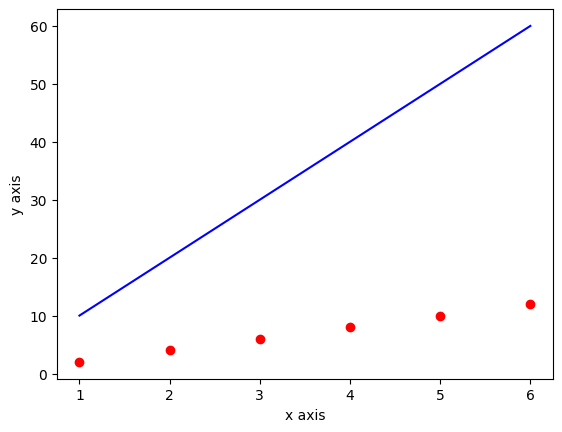

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.scatter(x,y,color="red")
reg=linear_model.LinearRegression().fit(x,y)
plt.plot(x,reg.predict(z),color="blue")

#Practice_2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
path = "/content/sample_data/Practice.csv"
try:
    df = pd.read_csv(path)
    print("Data successfully loaded!")

    # Print first 5 rows
    print(df)

    # Check for any missing values
    print("\nMissing Values:\n", df.isnull().sum())

    # Basic info about the dataset
    print("\nData Information:\n")
    print(df.info())

    # Summary statistics of numerical columns
    print("\nSummary Statistics:\n")
    print(df.describe())

except FileNotFoundError as e:
    print(f"File not found: {e}")


Data successfully loaded!
   area  price
0  2600   5500
1  3000   5650
2  3200   6100
3  3600   6800
4  4000   7250

Missing Values:
 area     0
price    0
dtype: int64

Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes
None

Summary Statistics:

              area        price
count     5.000000     5.000000
mean   3280.000000  6260.000000
std     540.370243   749.499833
min    2600.000000  5500.000000
25%    3000.000000  5650.000000
50%    3200.000000  6100.000000
75%    3600.000000  6800.000000
max    4000.000000  7250.000000


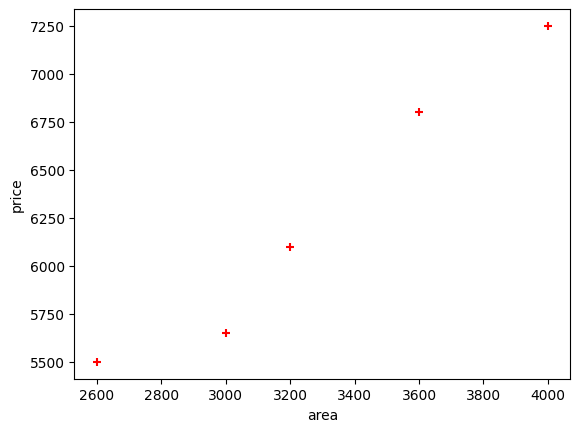

In [ ]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price,color="red",marker="+")

In [ ]:
reg=linear_model.LinearRegression().fit(df[["area"]],df.price)
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6287.15753425])

In [ ]:
reg.coef_

array([1.35787671])

In [ ]:
reg.intercept_

1806.1643835616433

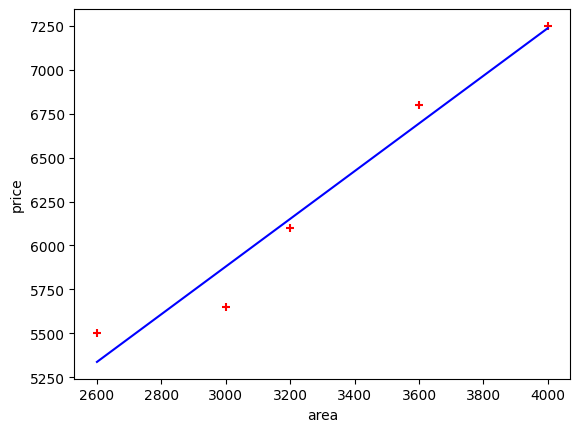

In [ ]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price,color="red",marker="+")
plt.plot(df.area,reg.predict(df[["area"]]),color="blue")

# Practice_3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

path = "/content/sample_data/Practice.csv"
df = pd.read_csv(path)
print(df.head())

   area  bedroooms  age  price
0  2600        3.0   20   5500
1  3000        4.0   15   5650
2  3200        NaN   18   6100
3  3600        3.0   30   6800
4  4000        5.0   10   7250


In [ ]:
df.bedroooms=df.bedroooms.fillna(df.bedroooms.median())
df

,area,bedroooms,age,price
0,2600,3.0,20,5500
1,3000,4.0,15,5650
2,3200,3.5,18,6100
3,3600,3.0,30,6800
4,4000,5.0,10,7250


In [ ]:
reg=linear_model.LinearRegression().fit(df[["area","bedroooms","age"]],df.price)

In [ ]:
reg.predict([[3000,3,40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5422.59194396])

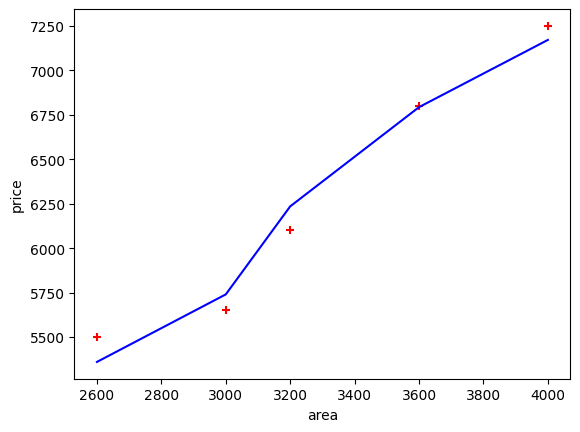

In [ ]:
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price,color="red",marker="+")
plt.plot(df.area,reg.predict(df[["area","bedroooms","age"]]),color="blue")

# Practice_4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

path = "/content/sample_data/Practice/Dummy_variable.csv"
df = pd.read_csv(path)
print(df.head(13))

              town  area   price
0   monroetownship  2600  550000
1   monroetownship  3000  565000
2   monroetownship  3200  610000
3   monroetownship  3600  680000
4   monroetownship  4000  725000
5      westwindsor  2600  585000
6      westwindsor  2800  615000
7      westwindsor  3300  650000
8      westwindsor  3600  710000
9     robbinsville  2600  575000
10    robbinsville  2900  600000
11    robbinsville  3100  620000
12    robbinsville  3600  650000


In [ ]:
dummies = pd.get_dummies(df.town  ).astype(int)
dummies

,monroetownship,robbinsville,westwindsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [ ]:
merged=pd.concat([df,dummies],axis="columns")
merged

,town,area,price,monroetownship,robbinsville,westwindsor
0,monroetownship,2600,550000,1,0,0
1,monroetownship,3000,565000,1,0,0
2,monroetownship,3200,610000,1,0,0
3,monroetownship,3600,680000,1,0,0
4,monroetownship,4000,725000,1,0,0
5,westwindsor,2600,585000,0,0,1
6,westwindsor,2800,615000,0,0,1
7,westwindsor,3300,650000,0,0,1
8,westwindsor,3600,710000,0,0,1
9,robbinsville,2600,575000,0,1,0


In [ ]:
final=merged.drop(["town","westwindsor"],axis="columns")
final

,area,price,monroetownship,robbinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X=final.drop("price",axis="columns")
X

,area,monroetownship,robbinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [ ]:
y=final.price
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000
5,585000
6,615000
7,650000
8,710000
9,575000


In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.predict([[2800,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([582186.35777253])

In [ ]:
model.score(X,y)

0.9243042019392452

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
dfle=df
le.fit_transform(dfle.town)

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [ ]:
dfle.town=le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


# Practice_5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

path="/content/sample_data/Practice/car_prices.csv"
df=pd.read_csv(path)
df

,Mileage,Age(yrs),SellPrice($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


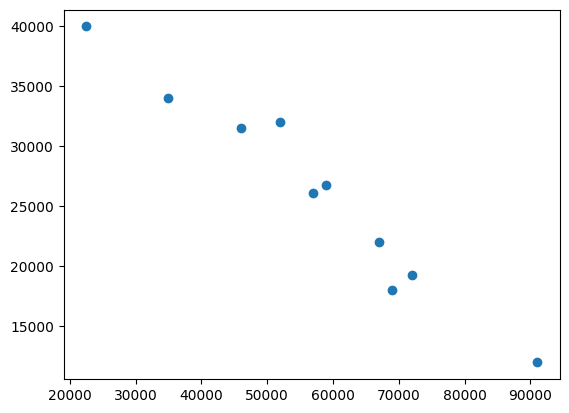

In [ ]:
plt.scatter(df["Mileage"],df["SellPrice($)"])

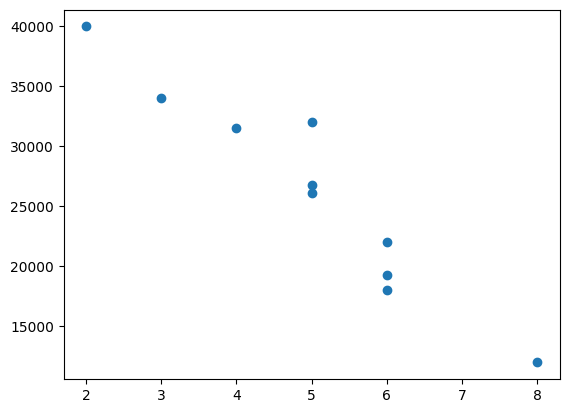

In [ ]:
plt.scatter(df["Age(yrs)"],df["SellPrice($)"])

In [ ]:
X=df[["Mileage","Age(yrs)"]]
y=df["SellPrice($)"]
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [ ]:
y

,SellPrice($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,26750
6,32000
7,19300
8,12000
9,22000


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train

,Mileage,Age(yrs)
6,52000,5
0,69000,6
4,46000,4
5,59000,5
1,35000,3
3,22500,2
8,91000,8
9,67000,6


In [ ]:
y_train

,SellPrice($)
6,32000
0,18000
4,31500
5,26750
1,34000
3,40000
8,12000
9,22000


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.predict(X_test)

array([26042.53926702, 17631.07411649])

In [ ]:
model.score(X_test,y_test)

0.879385149633327

# Lasso & Ridge Regression

In [64]:
import pandas as pd
from matplotlib import pyplot as plt

path="/content/Melbourne_housing_FULL.csv"
data=pd.read_csv(path)
# df.head()
df=pd.DataFrame(data)
print(data.shape)

(34857, 21)


In [14]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [53]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
# Suppress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [54]:
# df.isna()
df.isna().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,7610
Method,0
SellerG,0
Date,0
Distance,1
Postcode,1


In [65]:
col_to_use=['Suburb',  'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance', 'Bedroom2', 'Bathroom', 'Car','Landsize', 'BuildingArea',  'CouncilArea', 'Regionname', 'Propertycount']

In [66]:
df=df[col_to_use]
# df.head()

In [57]:
df.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Price,7610
Method,0
SellerG,0
Distance,1
Bedroom2,8217
Bathroom,8226
Car,8728


In [67]:
col_to_fill_zero=['Propertycount','Distance','Bedroom2', 'Bathroom', 'Car']
df[col_to_fill_zero]=df[col_to_fill_zero].fillna(0)

In [27]:
df.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Price,7610
Method,0
SellerG,0
Distance,0
Bedroom2,0
Bathroom,0
Car,0


In [68]:
df['Landsize']=df['Landsize'].fillna(df['Landsize'].mean())
df['BuildingArea']=df['BuildingArea'].fillna(df['BuildingArea'].mean())

In [63]:
df.isna().sum()

,0
Rooms,0
Distance,0
Bedroom2,0
Bathroom,0
Car,0
...,...
Regionname_Northern Victoria,0
Regionname_South-Eastern Metropolitan,0
Regionname_Southern Metropolitan,0
Regionname_Western Metropolitan,0


In [69]:
df.dropna(inplace=True)
df.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Distance,0
Bedroom2,0
Bathroom,0
Car,0


In [70]:
df= pd.get_dummies(df, drop_first=True)
df.astype(int)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000,2,2,1,1,202,160,4019,0,...,0,1,0,0,1,0,0,0,0,0
2,2,1035000,2,2,1,0,156,79,4019,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000,2,3,2,0,134,150,4019,0,...,0,1,0,0,1,0,0,0,0,0
5,3,850000,2,3,2,1,94,160,4019,0,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000,2,3,1,2,120,142,4019,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000,6,4,1,3,593,160,6543,0,...,0,0,0,0,0,0,0,0,1,0
34853,2,888000,6,2,2,1,98,104,6543,0,...,0,0,0,0,0,0,0,0,1,0
34854,2,705000,6,2,1,2,220,120,6543,0,...,0,0,0,0,0,0,0,0,1,0
34855,3,1140000,6,0,0,0,593,160,6543,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
X=df.drop('Price', axis=1)
y=df.Price

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [73]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(X_train,y_train)

In [74]:
model.score(X_train,y_train)

0.6792421760392956

In [76]:
model.score(X_test,y_test)

0.6748321429522199

In [77]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1, max_iter=1000, tol=0.1)
clf.fit(X_train,y_train)

Lasso(alpha=0.1, tol=0.1)

In [78]:
clf.score(X_train,y_train)

0.6792393941837616

In [79]:
clf.score(X_test,y_test)

0.674660334442863

In [82]:
from sklearn.linear_model import Ridge
ridge_clf=Ridge(alpha=0.1, max_iter=1000, tol=0.1).fit(X_train,y_train)

In [83]:
ridge_clf.score(X_train,y_train)

0.6792196117363474

In [84]:
ridge_clf.score(X_test,y_test)

0.6754326558799537